# LIDAR Basic Tests

## Objective

To evaluate Garmin's LIDAR Lite V4 suitability for the project by testing its ability to measure various distances under different lighting conditions.

## Experiment Details

### Experiment Setup

- **Sensor Positioning**: At regular 0.5m intervals ranging from 0.5m to 5.0m, with the sensor directed at a wall.
- **Test Environments**: Indoors, outdoors, and outdoors with a 3D-printed shade.
- **Data Collection**: Each test generated approximately 500 distance measurement points.

### Data Extraction

- **Indoors & Outdoors**: Utilized WaveShare's official software to transfer data into Excel files.

## Data Structure and Cleanup

- **File Organization**: Each distance interval (e.g., 0.5m, 1.0m, etc.) stores its measurements in a separate file located in their respective folders.
- **WaveShare Software**: I extract distance values from the Excel files generated by the software.
- **Raspberry Pi**: Every measurement from the Raspberry Pi includes time, distance and signal strength:

    ```text
    09:48:30 1030 659
    ```

- I keep the distances and filter out time and signal strength.

## Sensor Sepcification

- **Frequency**: Up to 200Hz.
- **Accuracy and Standard Deviation**:

||2m|4m|10m|
|---|---|---|---|
|Measurement|±1.0cm|±2.0cm|±5cm|

## Code Setup

### Imports

To maintain a clean and organized notebook, various functionalities have been distributed into separate Python modules:

- [`cleaner.py`](../src/data/cleaner.py) includes data cleaning functions.
- [`processing.py`](../src/data/processing.py) includes data processing functions.
- [`loader.py`](../src/data/loader.py) aids in extracting sensor data from text files.
- [`basic_graphs.py`](../src/graphing/basic_graphs.py) provides utilities for data visualization.

In [1]:
import pathlib
import sys

import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

sys.path.append("../src")

from data import cleaner, processing
from data.loader import FolderData
from graphing import basic_graphs

### Data Preparation and Loading

I define the list of actual distances measured and load the data files.

In [2]:
ACTUAL_DISTANCES = [0.5 * i for i in range(1, 11)]

INDOORS_DATA_PATH = pathlib.Path("../data/processed/lidar_basic_tests/indoors/")
# OUTDOORS_DATA_PATH = pathlib.Path("../data/processed/tof_basic_tests/outdoors/")

indoors_data = FolderData(INDOORS_DATA_PATH)
# outdoors_data = FolderData(OUTDOORS_DATA_PATH)

## Data Analysis

### Accuracy Assessment

- **Objective**: The sensor's accuracy is evaluated by comparing the mean measured distance to the actual distance at each interval.
- **Explanation**: Accuracy in our tests refers to how close our measurements are to the true values.
- **Analysis**: 

In [3]:
indoors_mean = processing.get_mean(indoors_data.distances)
# outdoors_mean = processing.get_mean(outdoors_data.distances)

data = {
    "Actual Distance": ACTUAL_DISTANCES,
    # "Outdoors Mean": outdoors_mean,
    "Indoors Mean": indoors_mean,
}
df = pd.DataFrame(data)
display(df.T)

,0,1,2,3,4,5,6,7,8,9
Actual Distance,0.50,1.00,1.50,2.00,2.50,3.0,3.50,4.00,4.50,5.0
Indoors Mean,0.52,1.01,1.52,2.05,2.52,3.0,3.52,4.01,4.52,5.0


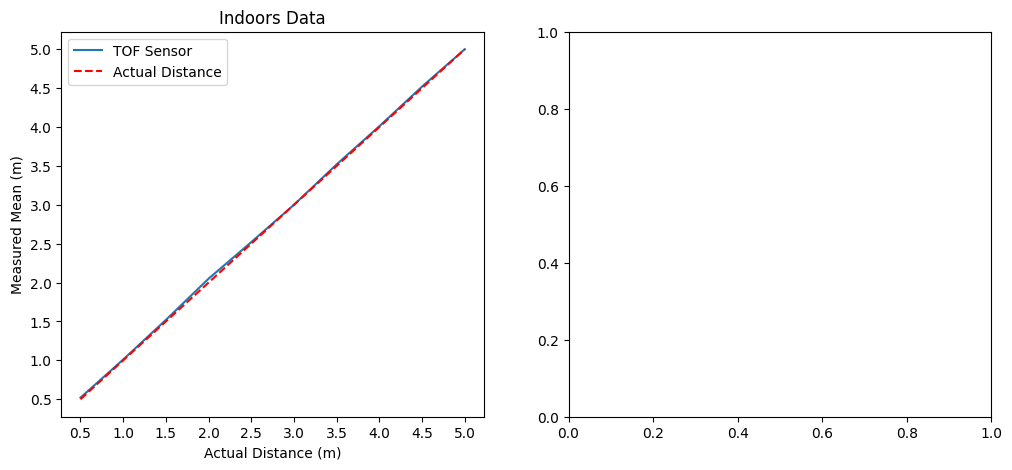

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
basic_graphs.plot_mean_vs_actual_distance(axes[0], indoors_mean, "Indoors Data")
# basic_graphs.plot_mean_vs_actual_distance(axes[1], outdoors_mean, "Outdoors Data")
plt.show()

### Precision Assessment

- **Objective**: The sensor's precision is evaluated by plotting a scatter plot of the raw data and analyzing the spread of the points.
- **Explanation**: Precision in our tests refers to how close our measurements are to each other.
- **Analysis**: 

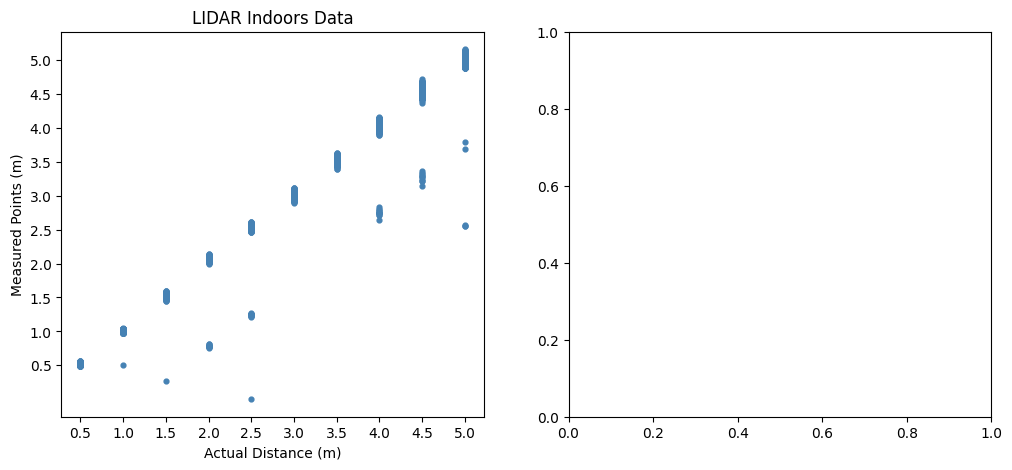

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
basic_graphs.plot_scatter(axes[0], indoors_data.distances, "LIDAR Indoors Data")
# basic_graphs.plot_scatter(axes[0][1], outdoors_data.distances, "LIDAR Outdoors Data")
plt.show()

### Reliability Assessment: Standard Deviation

- **Objective**: Visualize the consistency of the laser sensor compared to the TOF sensor in each environment via standard deviation.
- **Explanation**: The standard deviation provides a measure of the spread of our measurements. In our context, a smaller standard deviation indicates that our measurements are tightly packed around the average value, hinting at both accuracy and precision.
- **Analysis**:

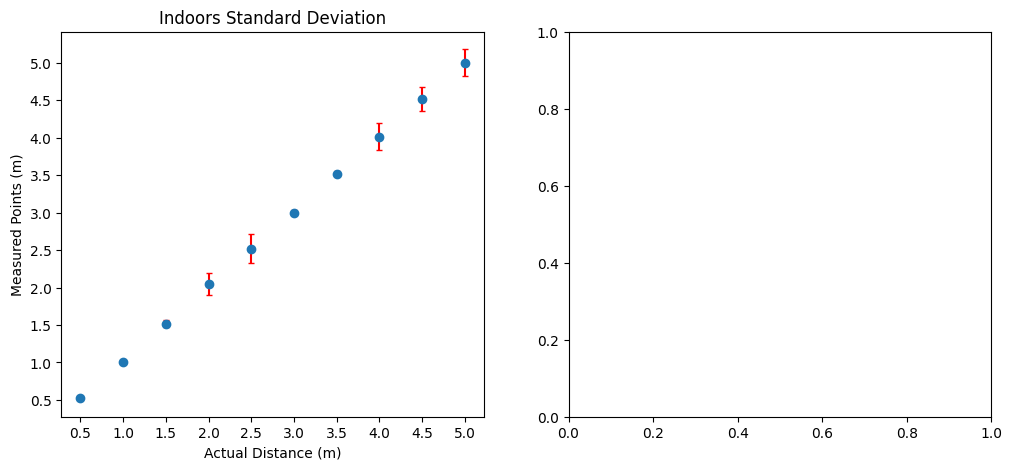

In [6]:
indoors_std = processing.get_std(indoors_data.distances)
# outdoors_std = processing.get_std(outdoors_data.distances)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
basic_graphs.plot_std_errorbar(axes[0], indoors_mean, indoors_std, "Indoors Standard Deviation")
# basic_graphs.plot_std_errorbar(axes[1], outdoors_mean, outdoors_std, "Outdoors Standard Deviation")
plt.show()

### Reliability Assessment: Best Fit Line

- **Objective**: Compare the line of best fit for each dataset to gauge the sensor's reliability.
- **Explanation**: The best fit line provides a visual representation of the correlation between measured values and actual values. A slope close to 1 implies a direct, proportional relationship.
- **Data Cleaning**:reprocessing—specifically, discarding data points exceeding one standard deviation from the mean.

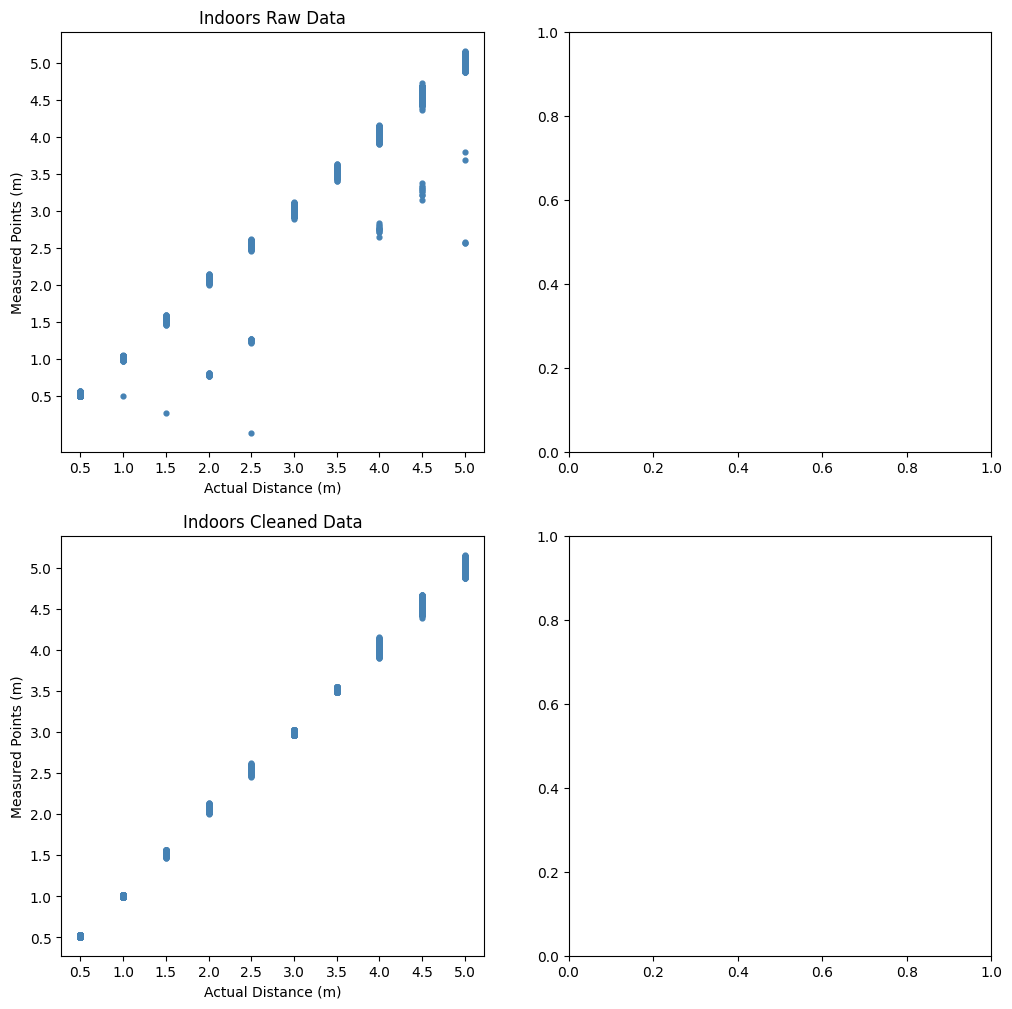

In [7]:
indoors_cleaned = cleaner.clean_basic_test_data(indoors_data.distances)
# outdoors_cleaned = cleaner.clean_basic_test_data(outdoors_data.distances)

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

basic_graphs.plot_scatter(axes[0][0], indoors_data.distances, "Indoors Raw Data")
# basic_graphs.plot_scatter(axes[0][1], outdoors_data.distances, "Outdoors Raw Data")

basic_graphs.plot_scatter(axes[1][0], indoors_cleaned, "Indoors Cleaned Data")
# basic_graphs.plot_scatter(axes[1][1], outdoors_cleaned, "Outdoors Cleaned Data")
plt.show()

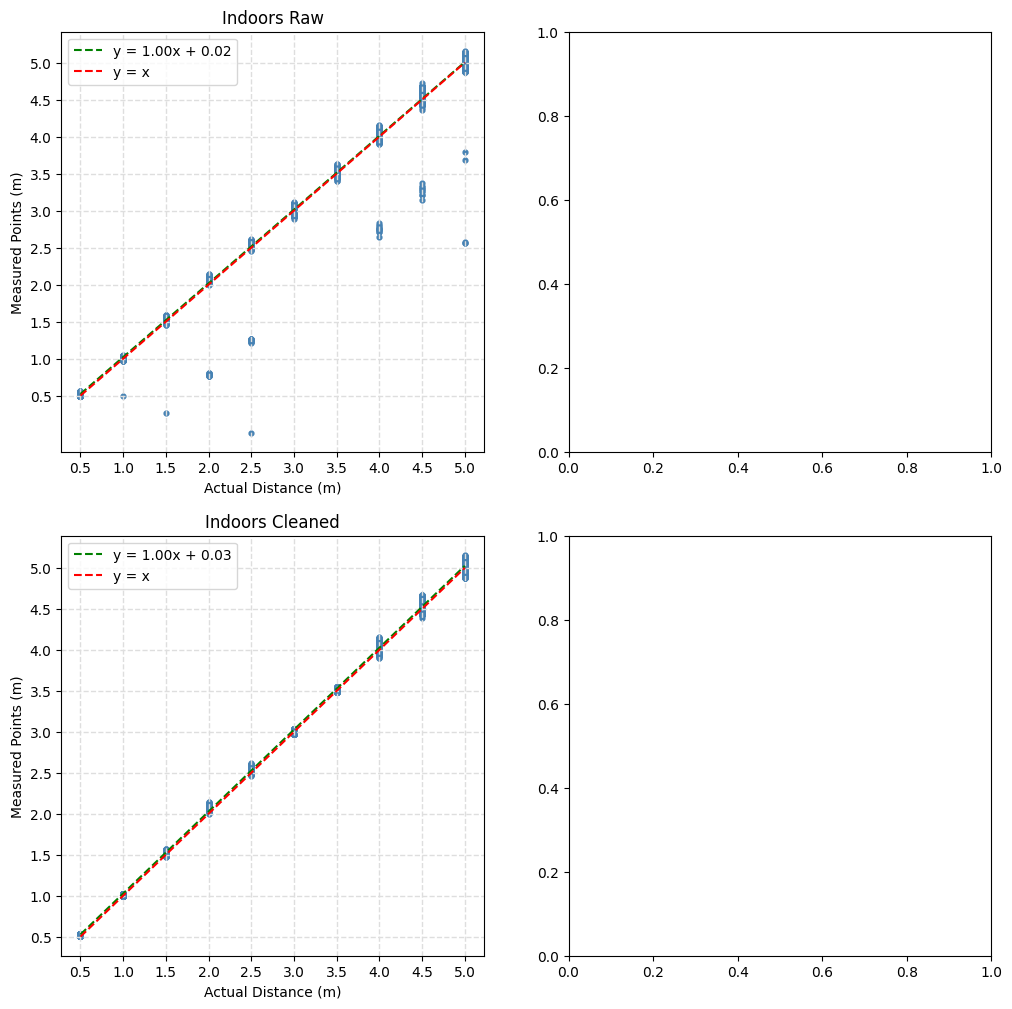

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

basic_graphs.plot_best_fit_scatter(axes[0][0], indoors_data.distances, "Indoors Raw")
# basic_graphs.plot_best_fit_scatter(axes[0][1], outdoors_data.distances, "Outdoors Raw")

basic_graphs.plot_best_fit_scatter(axes[1][0], indoors_cleaned, "Indoors Cleaned")
# basic_graphs.plot_best_fit_scatter(axes[1][1], outdoors_cleaned, "Outdoors Cleaned")

plt.show()

## Conclusion